<a href="https://colab.research.google.com/github/SehanArandara/DL-Lab-05/blob/main/IT21164330Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [ ]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [ ]:
# Load Data
file_path = 'GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [ ]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [ ]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [ ]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [ ]:

# Define the LSTM Model
model = Sequential()

# First LSTM layer with more units and return sequences
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))  # Increased units from 50 to 100
model.add(Dropout(0.3))  # Increased dropout from 0.2 to 0.3

# Second LSTM layer with increased units
model.add(LSTM(units=100, return_sequences=True))  # Added return_sequences=True to stack another LSTM layer
model.add(Dropout(0.3))

# Third LSTM layer (newly added)
model.add(LSTM(units=50, return_sequences=False))  # Added a third LSTM layer with 50 units
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1))

# Compile the model with a different optimizer and loss function for experimentation
model.compile(optimizer='adam', loss='mean_squared_error')  # Changed loss to 'mean_squared_error'

C:\Users\HP EliteBook\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [ ]:
# Train the Model with modified epochs and batch size
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)  # Increased epochs to 50 and batch_size to 64

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 0.2993
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0459
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0417
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0391
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0383
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0270
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0374
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0195
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0309
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0271
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.0200
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0248
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0176
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0216
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0184
Epoch 16/50
3/3 ━━━

In [ ]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 825ms/step


In [ ]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

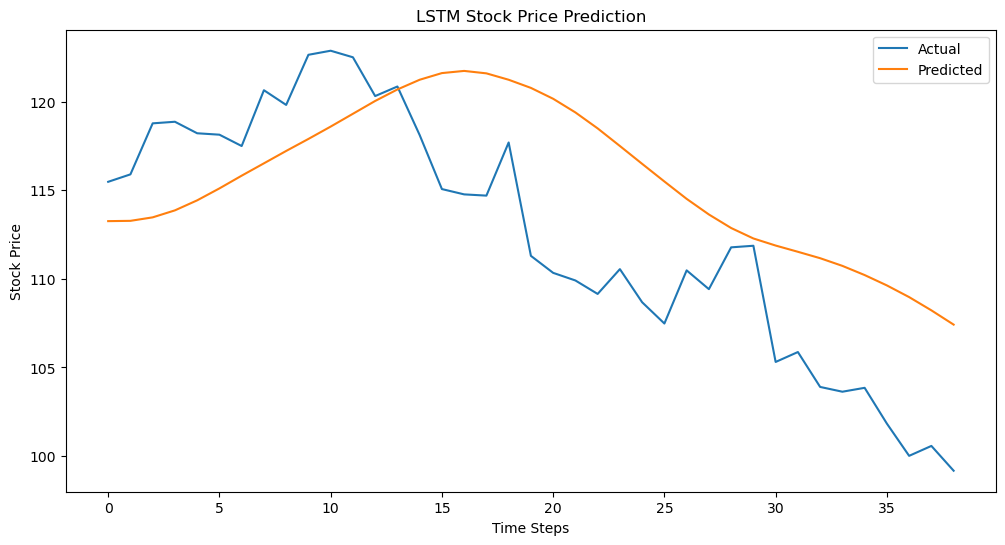

In [ ]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


### Purpose of Normalizing 'Close' Prices:

Normalization is crucial for neural networks, including LSTM models, because it scales the input data to a similar range. This helps in achieving faster convergence during training and stabilizes the learning process. By normalizing the 'Close' prices, the model can more effectively learn the underlying patterns in the data without being biased by varying scales. This is particularly important for LSTM networks as they can be sensitive to the magnitude of input values.

### Purpose of the Dropout Layer in the LSTM Model:

The Dropout layer is a regularization technique used to prevent overfitting in neural networks. During training, dropout randomly sets a fraction of input units to zero at each update, which forces the model to learn more robust features by not relying too heavily on any particular set of neurons. This helps the model generalize better to new, unseen data and reduces the likelihood of the model memorizing the training data.

### Interpretation of Predicted Line Closely Following Actual Line:

If the predicted line closely follows the actual line in the plot, it indicates that the LSTM model is performing well in forecasting stock prices. This alignment suggests that the model has effectively learned the patterns and trends in the historical data and is capable of making accurate predictions. It reflects good model performance and effective learning from the data.